In [1]:
import pandas as pd

In [25]:
df = pd.read_csv('salary.csv', delimiter=';')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [4]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [6]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False)

YearsExperience    0.0
Salary             0.0
dtype: float64

In [7]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [26]:
X = df['YearsExperience']
y = df['Salary']

In [9]:
X[0:5]

0    1.1
1    1.3
2    1.5
3    2.0
4    2.2
Name: YearsExperience, dtype: float64

In [10]:
y[0:5]

0    39343
1    46205
2    37731
3    43525
4    39891
Name: Salary, dtype: int64

In [13]:
import matplotlib.pyplot as plt

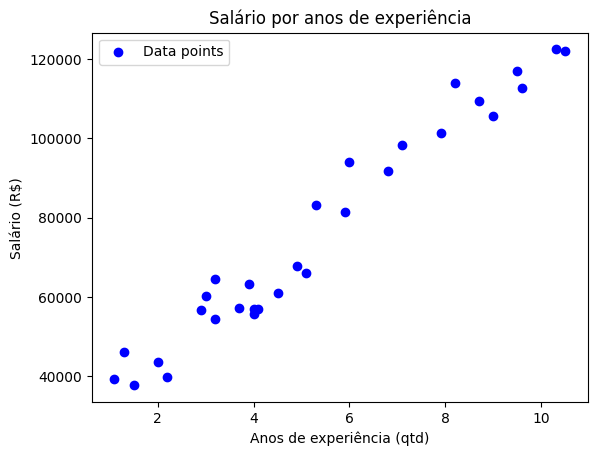

In [14]:
plt.scatter(X, y, color='blue', label='Data points')
plt.xlabel('Anos de experiência (qtd)')
plt.ylabel('Salário (R$)')
plt.title('Salário por anos de experiência')
plt.legend()
plt.show()

In [16]:
from sklearn.tree import DecisionTreeRegressor

In [17]:
regressor = DecisionTreeRegressor()

In [27]:
X = X.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)

In [28]:
regressor.fit(X, y)

DecisionTreeRegressor()

In [29]:
y_pred = regressor.predict(X)

In [30]:
y_pred[0:5]

array([39343., 46205., 37731., 43525., 39891.])

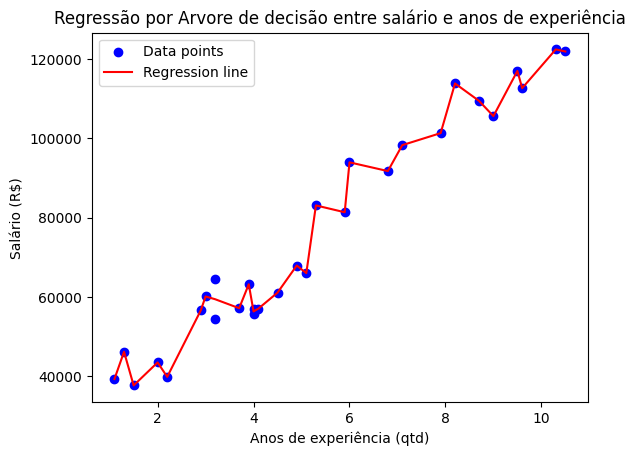

In [31]:
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.xlabel('Anos de experiência (qtd)')
plt.ylabel('Salário (R$)')
plt.title('Regressão por Arvore de decisão entre salário e anos de experiência')
plt.legend()
plt.show()

In [33]:
import numpy as np

In [34]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

<ipython-input-34-7269cee1a941>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01)


In [35]:
X_grid[0:5]

array([[1.1 ],
       [1.11],
       [1.12],
       [1.13],
       [1.14]])

In [37]:
y_pred_grid = regressor.predict(X_grid)

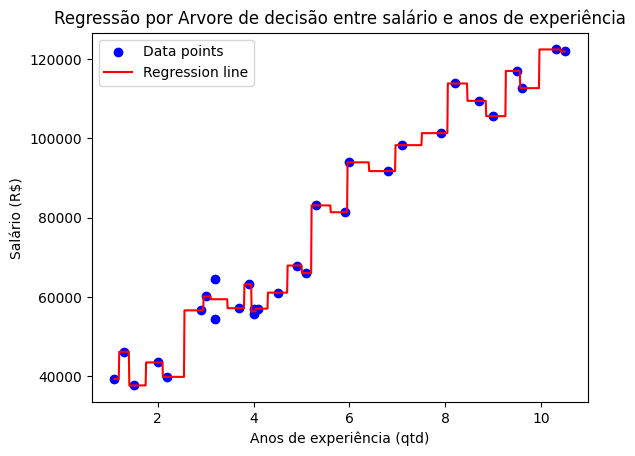

In [38]:
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_grid, y_pred_grid, color='red', label='Regression line')
plt.xlabel('Anos de experiência (qtd)')
plt.ylabel('Salário (R$)')
plt.title('Regressão por Arvore de decisão entre salário e anos de experiência')
plt.legend()
plt.show()

In [39]:
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

In [41]:
f'Mean Squared Error: {mse}, R^2 Score: {r2}'

'Mean Squared Error: 1689209.4833333334, R^2 Score: 0.9976748641432848'

In [42]:
from sklearn.tree import export_graphviz

In [43]:
export_graphviz(regressor, out_file='tree.dot', feature_names=['YearsExperience'])

graphviz.svg

Link para gerar a figura da árvore de decisão: https://dreampuf.github.io/GraphvizOnline